# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

> The dataset represents 17 campaigns, corresponding to a total of 79354 contacts. The success rate was 8%.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
contentRoot = '/content/drive/MyDrive/Github/machinelearning/comparing-classifiers'
df = pd.read_csv('{}/data/bank-additional-full.csv'.format(contentRoot), sep = ';')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 


> None of the columns have missing values, this dataset does not require any cleaning.

> Based on the data description, a few categories emerge:
1.   Numeric Features: `age`, `duration`, `campaign`, `pdays`, `previous`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`
2.   Binary Valued Features: `default`, `housing`, `loan`
3.   Categorical features that can be converted to a number: `month`, `day_of_week`
4.   Other categorical features: all other columns

> Based on the above categorization, once the data is mapped, the transformations required include One-Hot Encoding and Scaling.





### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

> The business objective is to improve the effectiveness of the bank's marketing efforts, thereby reducing human and technology costs. The effectiveness of a marketing campaign may be defined as the percentage of customers who start a term deposit as a result of the campaign. To achieve said effectiveness, we would want to build a model that can classify customers based on their probability to convert.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [ ]:
#Remap labels to 1 or 0
df['y'] = df['y'].map({'yes':1, 'no':0})
print(df['y'].value_counts())

#Using only the first 8 columns for modeling as instructed
transformer = make_column_transformer(
    (
        (OneHotEncoder(drop = 'if_binary'),['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact'])
    ), remainder=StandardScaler()
    )
transformer

0    36548
1     4640
Name: y, dtype: int64


ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('onehotencoder',
                                 OneHotEncoder(drop='if_binary'),
                                 ['job', 'marital', 'education', 'default',
                                  'housing', 'loan', 'contact'])])

In [ ]:
X = transformer.fit_transform(df[['age','job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']])
y = df['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [ ]:
dummy_estimator = DummyClassifier().fit(X_train, y_train)
dummy_train_score = dummy_estimator.score(X_train, y_train)
dummy_test_score = dummy_estimator.score(X_test, y_test)
print('Train Score with Dummy Classifier is {}'.format(dummy_train_score))
print('Test Score with Dummy Classifier is {}'.format(dummy_test_score))

Train Score with Dummy Classifier is 0.8873434844438278
Test Score with Dummy Classifier is 0.8873512988589464


> The baseline model's performance is 88.76%. The baseline model is a dummy classifier that makes the majority prediction (in this case a 0 or no) for all rows and calculates accuracy. This can be observed from the confusion matrix below:

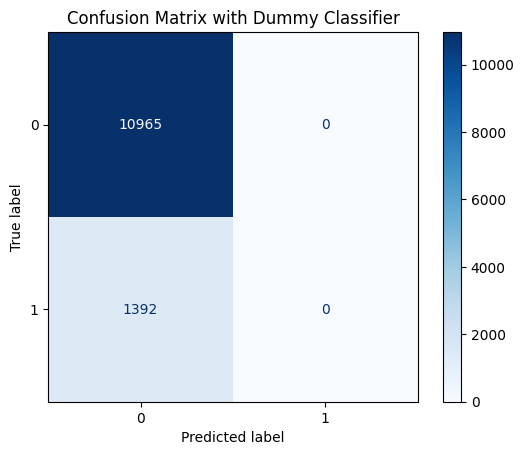

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        dummy_estimator,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title('Confusion Matrix with Dummy Classifier')
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [ ]:
lr_estimator = LogisticRegression(max_iter=1000).fit(X_train, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [ ]:
lr_train_score = lr_estimator.score(X_train, y_train)
lr_test_score = lr_estimator.score(X_test, y_test)
print('Train Score with LogisticRegression is {}'.format(lr_train_score))
print('Test Score with LogisticRegression is {}'.format(lr_test_score))

Train Score with LogisticRegression is 0.8873434844438278
Test Score with LogisticRegression is 0.8873512988589464


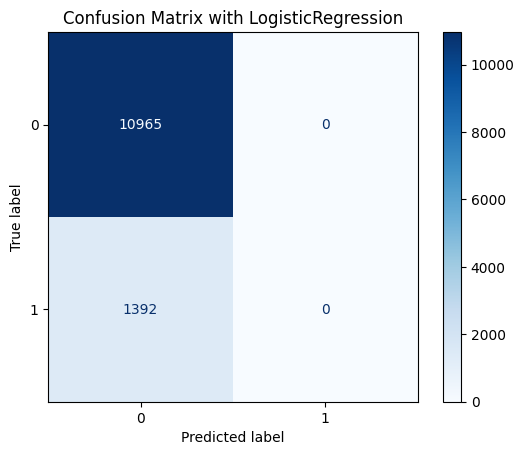

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
        lr_estimator,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title('Confusion Matrix with LogisticRegression')
plt.show()

Curiously, `LogisticRegression` predicted exactly the same values as the `DummyClassifier`, resulting in the exact same scores.

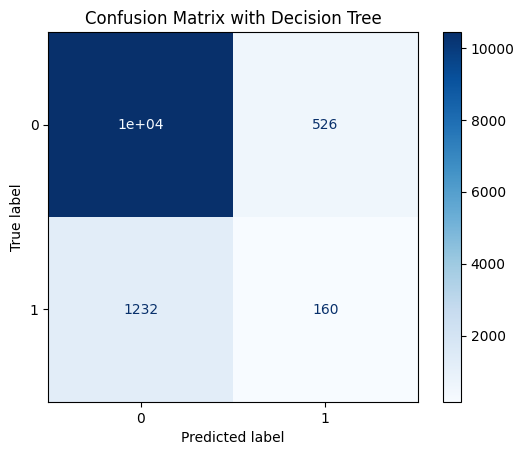

In [ ]:
dtree = DecisionTreeClassifier().fit(X_train, y_train)
disp = ConfusionMatrixDisplay.from_estimator(
        dtree,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title('Confusion Matrix with Decision Tree')
plt.show()

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [ ]:
estimators = {'Logistic Regression':LogisticRegression(max_iter = 1000),
              'Decision Tree':DecisionTreeClassifier(),
              'Support Vector Machine':SVC(),
              'K Nearest Neighbors':KNeighborsClassifier()}
scores_dict = {'Model':[], 'Train Time':[], 'Train Accuracy':[], 'Test Accuracy':[]}
import time

for estimator in estimators:
  start = time.time()
  fit_estimator = estimators[estimator].fit(X_train, y_train)
  stop = time.time()
  scores_dict['Model'].append(estimator)
  scores_dict['Train Accuracy'].append(fit_estimator.score(X_train, y_train))
  scores_dict['Test Accuracy'].append(fit_estimator.score(X_test, y_test))
  scores_dict['Train Time'].append(stop - start)

scores_dict

{'Model': ['Logistic Regression',
  'Decision Tree',
  'Support Vector Machine',
  'K Nearest Neighbors'],
 'Train Time': [0.33318448066711426,
  0.6955423355102539,
  72.9659070968628,
  0.0038614273071289062],
 'Train Accuracy': [0.8873434844438278,
  0.9269883111928133,
  0.8882106066386876,
  0.8927890118275468],
 'Test Accuracy': [0.8873512988589464,
  0.8588654204094845,
  0.8869466699036983,
  0.8758598365299021]}

In [ ]:
results = pd.DataFrame(scores_dict)
results

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.333184,0.887343,0.887351
1,Decision Tree,0.695542,0.926988,0.858865
2,Support Vector Machine,72.965907,0.888211,0.886947
3,K Nearest Neighbors,0.003861,0.892789,0.875860


> This analysis reveals that using the classifiers with default parameters and leveraging only the first 8 features from the data set produces little to no improvement over the baseline. In other words, none of these models satisfy the business objective. SVC and Logistic Regression match the test score of the baseline, while the other models performed worse.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

#### Feature Engineering & Exploration

Since the simple models with the bank information features did not yield results better than the baseline, we can attempt to increase the accuracy by:
* Transforming the 8 bank information features further and dropping some of them.
* Adding more features from the dataset

##### Exploratory data analysis on the 8 blank client features

1. Trying to simplify some of the features by mapping them to binary values

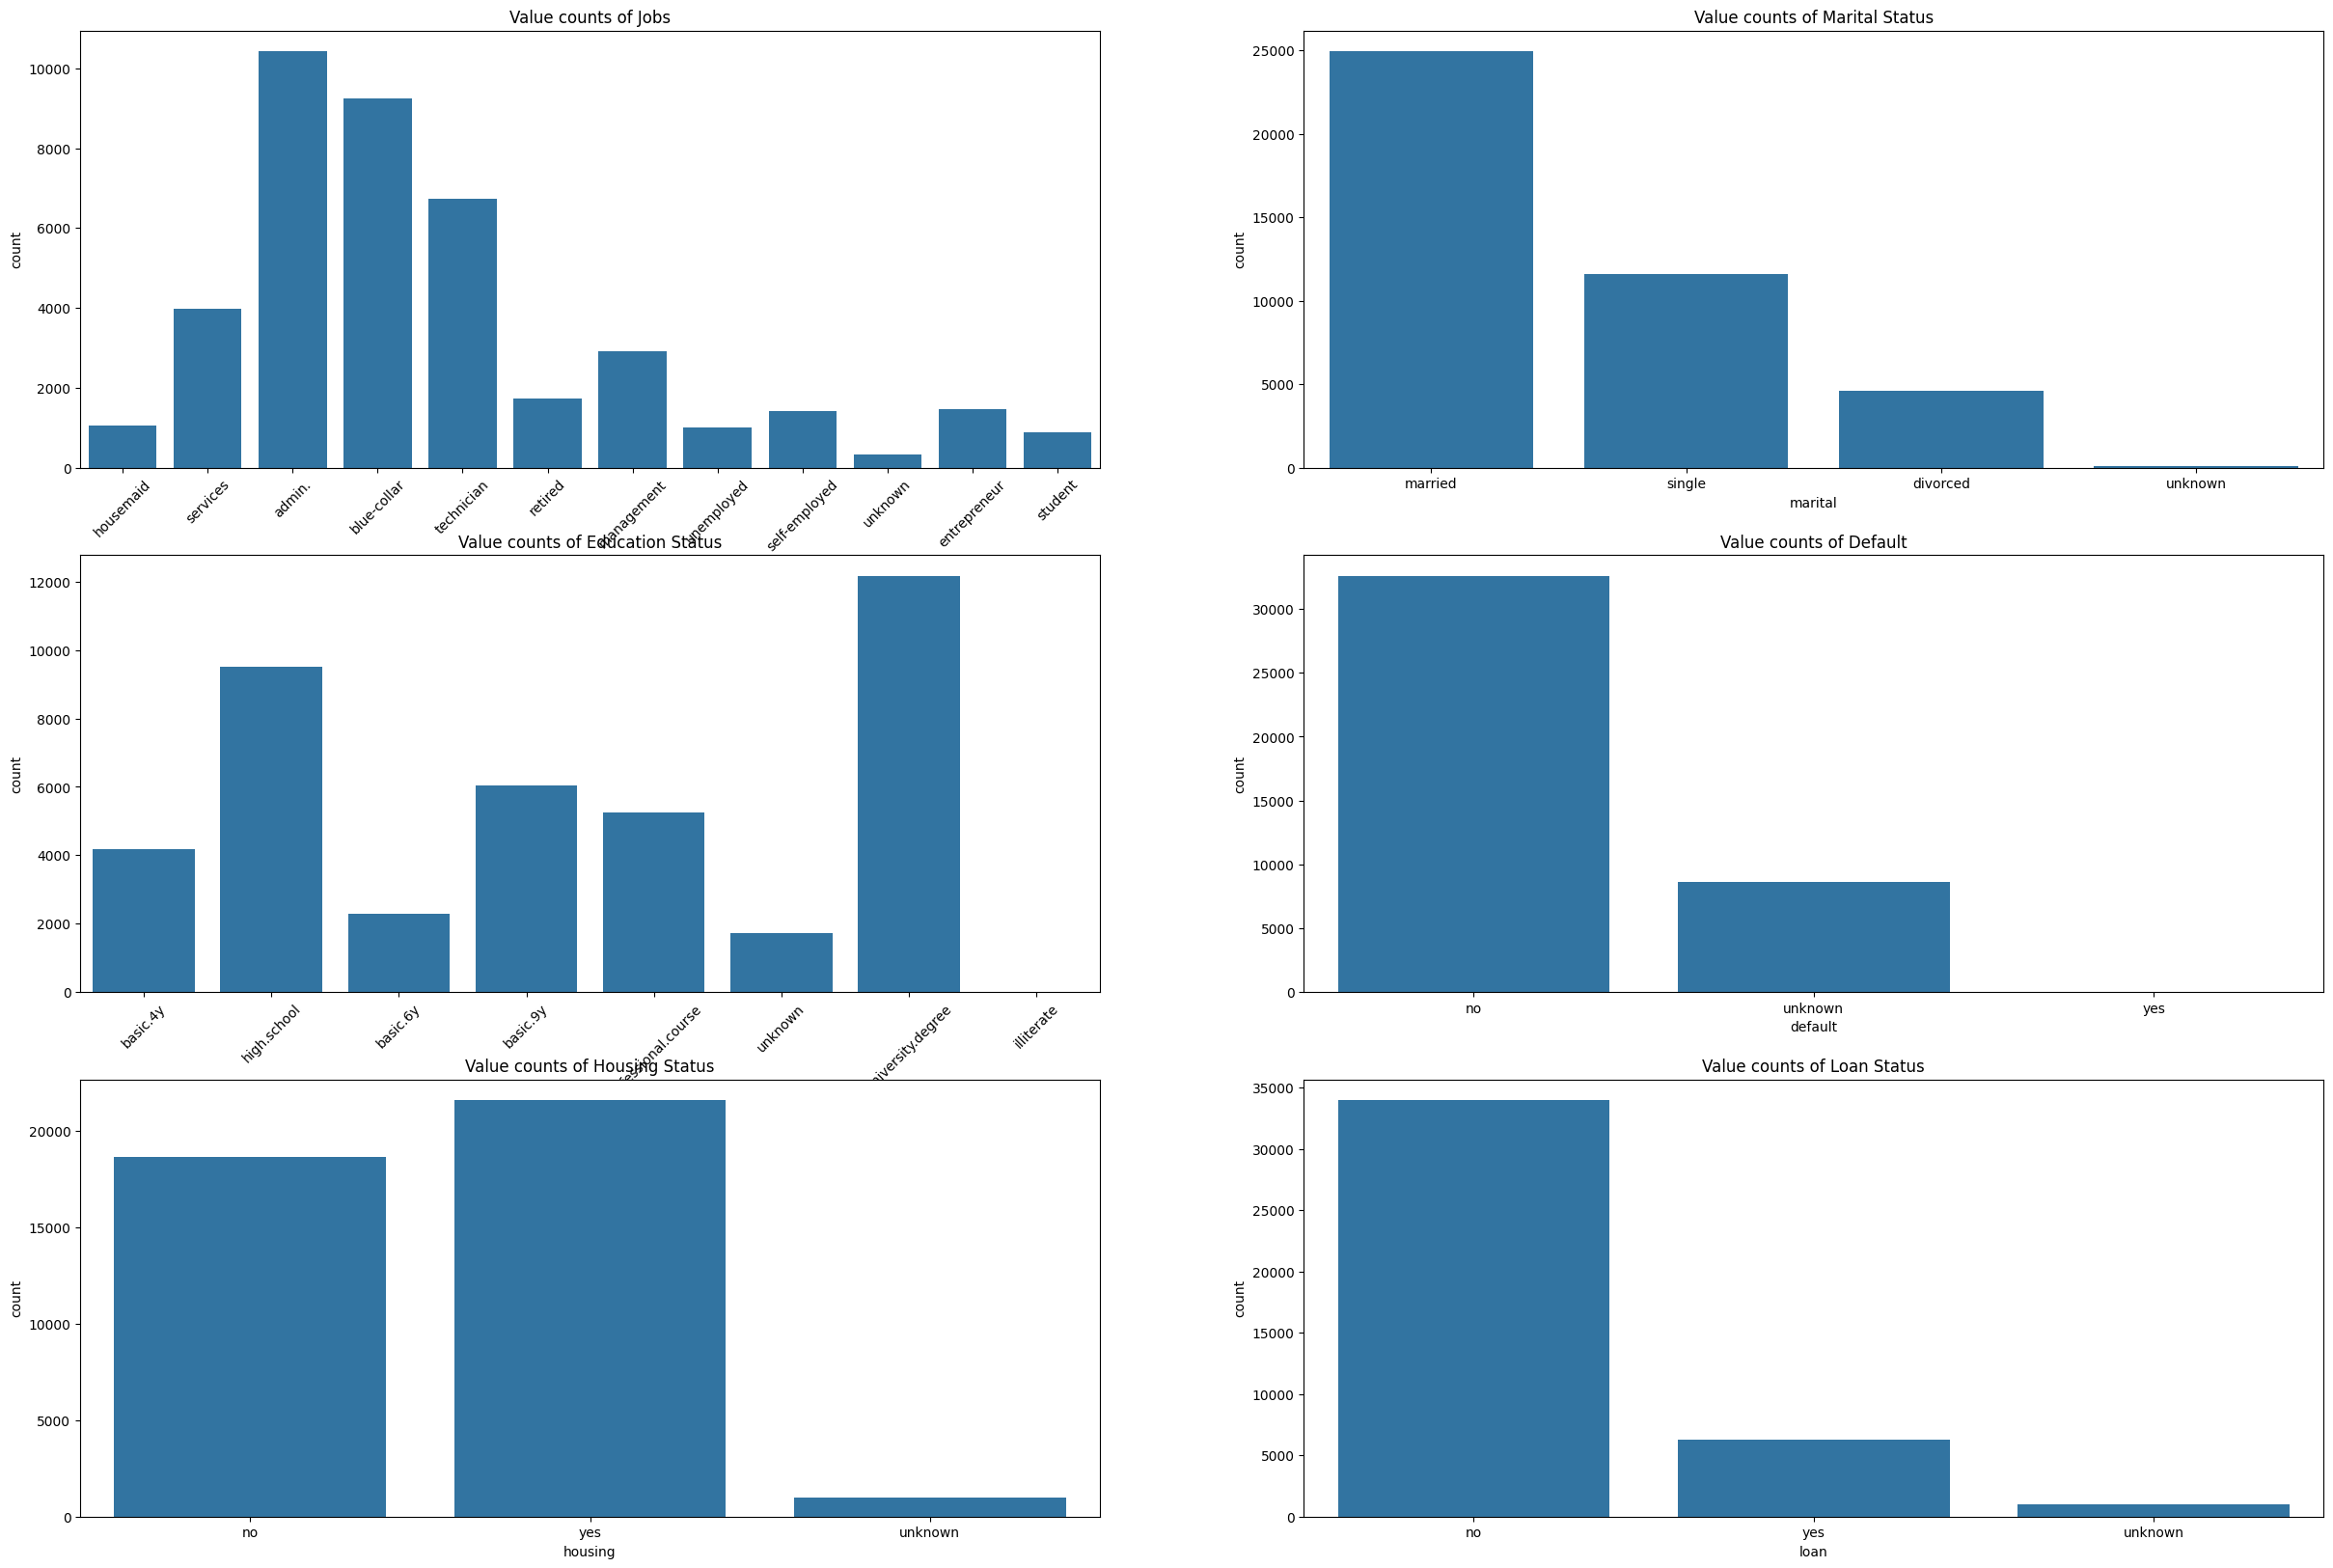

In [ ]:
eda_df = df

fig, axes = plt.subplots(3, 2, figsize=(30, 20))

sns.countplot(data=eda_df, x='job', ax=axes[0, 0])
axes[0, 0].set_title('Value counts of Jobs')
axes[0, 0].tick_params(axis='x', rotation=45)


#Map job to is_employed column
eda_df['is_employed'] = eda_df['job'].map({'admin.':1,
                                'blue-collar': 1,
                                'technician': 1,
                                'services': 1,
                                'management': 1,
                                'retired': 0,
                                'entrepreneur': 1,
                                'self-employed': 1,
                                'housemaid': 1,
                                'unemployed': 0,
                                'student': 0,
                                'unknown': 0})

sns.countplot(data=eda_df, x='marital', ax=axes[0, 1])
axes[0,1].set_title('Value counts of Marital Status')

#Map marital to is_married column
eda_df['is_married'] = eda_df['marital'].map({'divorced': 0,
                                      'married': 1,
                                      'single': 0,
                                      'unknown': 0})

sns.countplot(data=eda_df, x='education', ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1,0].set_title('Value counts of Education Status')
#Let's try dropping the education column

sns.countplot(data=eda_df, x='default', ax=axes[1, 1])
axes[1, 1].set_title('Value counts of Default')
#There are only a large number of unknowns and only 3 yes's. Let's drop this column

sns.countplot(data=eda_df, x='housing', ax=axes[2, 0])
axes[2,0].set_title('Value counts of Housing Status')
eda_df['housing'] = eda_df['housing'].map({'no': 0,
                                   'yes': 1,
                                   'unknown': 0})

sns.countplot(data=eda_df, x='loan', ax=axes[2, 1])
axes[2,1].set_title('Value counts of Loan Status')
eda_df['loan'] = eda_df['loan'].map({'no': 0,
                             'yes': 1,
                             'unknown': 0})

plt.show()

Let's now try to bin the age values instead of using scaler as in the first iteration

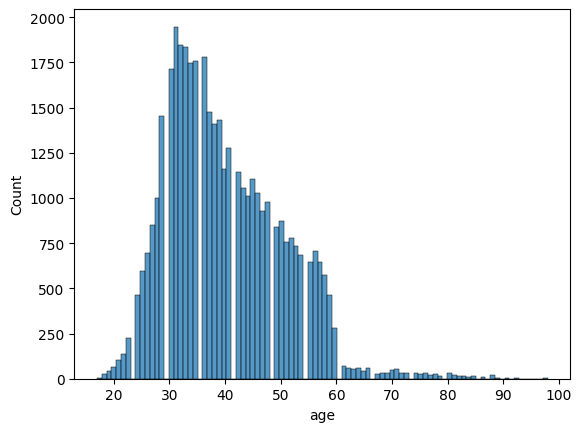

In [ ]:
sns.histplot(data=eda_df, x='age')
eda_df['age_cat'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, np.inf])

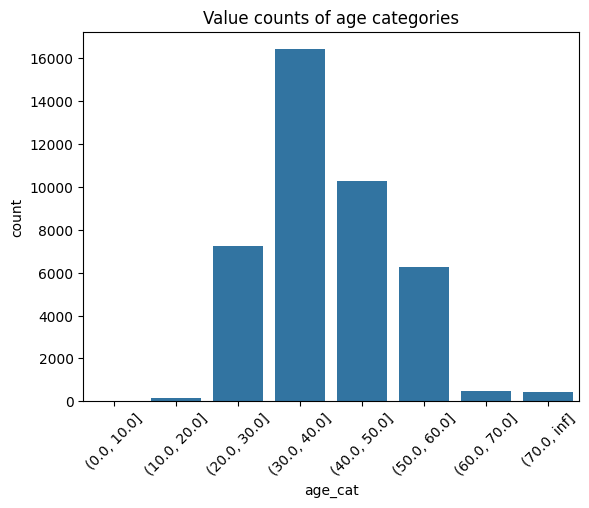

In [ ]:
sns.countplot(data=eda_df, x='age_cat')
plt.title('Value counts of age categories')
plt.xticks(rotation=45)
plt.show()

In [ ]:
transformer = make_column_transformer(
    (
        (OneHotEncoder(),['age_cat'])
    ), remainder='passthrough'
    )

X = transformer.fit_transform(df[['age_cat', 'is_employed', 'is_married', 'housing', 'loan']])
y = df['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)

In [ ]:
estimators = {'Logistic Regression':LogisticRegression(max_iter = 1000),
              'Decision Tree':DecisionTreeClassifier(),
              'Support Vector Machine':SVC(),
              'K Nearest Neighbors':KNeighborsClassifier()}
scores_dict = {'Model':[], 'Train Time':[], 'Train Accuracy':[], 'Test Accuracy':[]}
import time

for estimator in estimators:
  start = time.time()
  fit_estimator = estimators[estimator].fit(X_train, y_train)
  stop = time.time()
  scores_dict['Model'].append(estimator)
  scores_dict['Train Accuracy'].append(fit_estimator.score(X_train, y_train))
  scores_dict['Test Accuracy'].append(fit_estimator.score(X_test, y_test))
  scores_dict['Train Time'].append(stop - start)

scores_dict

{'Model': ['Logistic Regression',
  'Decision Tree',
  'Support Vector Machine',
  'K Nearest Neighbors'],
 'Train Time': [0.11883950233459473,
  0.027053117752075195,
  9.726261854171753,
  0.04024314880371094],
 'Train Accuracy': [0.8869966355658839,
  0.8876903333217717,
  0.8873781693316222,
  0.8868578960147064],
 'Test Accuracy': [0.8868657441126487,
  0.8872703730678967,
  0.8873512988589464,
  0.8871894472768471]}

In [ ]:
results = pd.DataFrame(scores_dict)
results

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.118840,0.886997,0.886866
1,Decision Tree,0.027053,0.887690,0.887270
2,Support Vector Machine,9.726262,0.887378,0.887351
3,K Nearest Neighbors,0.040243,0.886858,0.887189


##### Adding more features from the dataset

In [ ]:
df_all = eda_df

#We will remove education and default based on the prior exercise
transformer = make_column_transformer(
    (OneHotEncoder(drop = 'if_binary'),['age_cat', 'contact', 'month', 'day_of_week', 'poutcome']),
    (StandardScaler(), ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                        'cons.price.idx', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                        'nr.employed']),
    remainder='passthrough')

# Apply transformation
X = transformer.fit_transform(df_all[['age_cat', 'is_employed', 'is_married', 'housing', 'loan',
                                     'contact', 'month', 'day_of_week', 'poutcome',
                                     'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                                     'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                                     'nr.employed']])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=42)

In [ ]:
estimators = {'Logistic Regression':LogisticRegression(max_iter = 1000),
              'Decision Tree':DecisionTreeClassifier(),
              'Support Vector Machine':SVC(),
              'K Nearest Neighbors':KNeighborsClassifier()}
scores_dict = {'Model':[], 'Train Time':[], 'Train Accuracy':[], 'Test Accuracy':[]}
import time

for estimator in estimators:
  start = time.time()
  fit_estimator = estimators[estimator].fit(X_train, y_train)
  stop = time.time()
  scores_dict['Model'].append(estimator)
  scores_dict['Train Accuracy'].append(fit_estimator.score(X_train, y_train))
  scores_dict['Test Accuracy'].append(fit_estimator.score(X_test, y_test))
  scores_dict['Train Time'].append(stop - start)

scores_dict

{'Model': ['Logistic Regression',
  'Decision Tree',
  'Support Vector Machine',
  'K Nearest Neighbors'],
 'Train Time': [0.7063541412353516,
  0.22577857971191406,
  14.24825406074524,
  0.003347158432006836],
 'Train Accuracy': [0.910339565051507,
  0.9999653151122057,
  0.9190801567756929,
  0.9301099510943082],
 'Test Accuracy': [0.9109007040543822,
  0.8935825847697662,
  0.9121145909201263,
  0.9019179412478757]}

In [ ]:
results = pd.DataFrame(scores_dict)
results

,Model,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.706354,0.910340,0.910901
1,Decision Tree,0.225779,0.999965,0.893583
2,Support Vector Machine,14.248254,0.919080,0.912115
3,K Nearest Neighbors,0.003347,0.930110,0.901918


#### Hyperparameter tuning and grid search

Now that we have identified the right set of features and identified feature transformations that yield good results with default model parameters, we may now proceed to tune the hyper parameters using grid search.

In [ ]:
estimators = {'Logistic Regression':LogisticRegression(),
              'Decision Tree':DecisionTreeClassifier(),
              'Support Vector Machine':SVC(),
              'K Nearest Neighbors':KNeighborsClassifier()}
scores_dict = {'Model':[], 'Best Estimator': [], 'Train Time':[], 'Train Accuracy':[], 'Test Accuracy':[]}
param_grid = {}
param_grid['K Nearest Neighbors'] = {'n_neighbors':np.arange(1,30)}
param_grid['Logistic Regression'] = {'max_iter':[2,4,100,1000]}
param_grid['Decision Tree'] = {'max_depth':[0,4,10,100]}
param_grid['Support Vector Machine'] = {'kernel':['linear', 'rbf'], 'gamma': [-3,0, 3,30]}

import time
for estimator in estimators:
  model = estimators[estimator].fit(X_train, y_train)
  gscv = GridSearchCV(estimator=model, param_grid = param_grid[estimator], cv=5)
  gscv.fit(X_train, y_train)


  scores_dict['Model'].append(estimator)
  scores_dict['Best Estimator'].append(gscv.best_estimator_)
  scores_dict['Train Accuracy'].append(gscv.best_estimator_.score(X_train, y_train))
  scores_dict['Test Accuracy'].append(gscv.best_estimator_.score(X_test, y_test))
  scores_dict['Train Time'].append(gscv.cv_results_['mean_fit_time'].mean())

results = pd.DataFrame(scores_dict)
results

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

,Model,Best Estimator,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,LogisticRegression(),0.181220,0.910340,0.911143
1,Decision Tree,DecisionTreeClassifier(max_depth=4),0.108958,0.913877,0.913005
2,Support Vector Machine,"SVC(gamma=0, kernel='linear')",34.050069,0.904513,0.905317
3,K Nearest Neighbors,KNeighborsClassifier(n_neighbors=29),0.005216,0.912247,0.909282


In [185]:
results

,Model,Best Estimator,Train Time,Train Accuracy,Test Accuracy
0,Logistic Regression,LogisticRegression(),0.181220,0.910340,0.911143
1,Decision Tree,DecisionTreeClassifier(max_depth=4),0.108958,0.913877,0.913005
2,Support Vector Machine,"SVC(gamma=0, kernel='linear')",34.050069,0.904513,0.905317
3,K Nearest Neighbors,KNeighborsClassifier(n_neighbors=29),0.005216,0.912247,0.909282


Based on the Grid Search, Decision Tree with max_depth of 4 provided the highest Train and Test accuracy with minimal training time. With this model, we are able to beat the baseline accuracy by around 3%.

#### Adjusting the performance metric

With the winning model, we can check how the model performed in terms of precision, recall and other performance measures

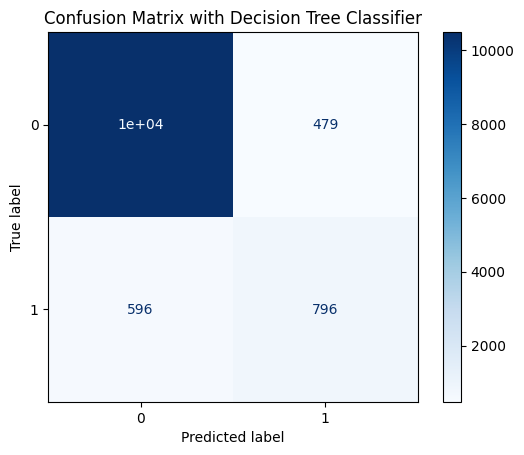

In [188]:
dtree_4 = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
disp = ConfusionMatrixDisplay.from_estimator(
        dtree_4,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
    )
disp.ax_.set_title('Confusion Matrix with Decision Tree Classifier')
plt.show()

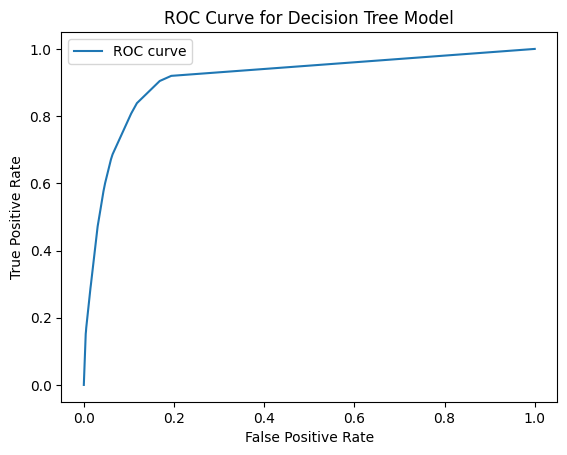

AUC: 0.9107765608429916


In [191]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, dtree_4.predict_proba(X)[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend()
plt.show()

# Calculate the AUC
auc = roc_auc_score(y, dtree_4.predict_proba(X)[:, 1])
print('AUC:', auc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


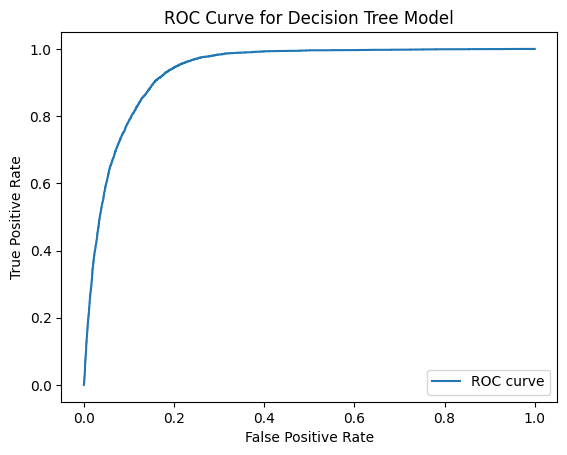

AUC: 0.9360463937599303


In [192]:
from sklearn.metrics import roc_curve, roc_auc_score

lr_model = LogisticRegression().fit(X_train, y_train)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y, lr_model.predict_proba(X)[:, 1])

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Model')
plt.legend()
plt.show()

# Calculate the AUC
auc = roc_auc_score(y, lr_model.predict_proba(X)[:, 1])
print('AUC:', auc)

Though Decision Tree performed slightly better with Accuracy as the metric, LogisticRegression has a higher AUC of 0.93 and performs better than the Decision Tree.

##### Questions